In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mixed_naive_bayes import MixedNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle

### Data Collection

In [2]:
datac = pd.read_csv(r"C:\Users\Nithya\Downloads\drug200.csv")

### Data Exploration

In [3]:
data = datac.copy()
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Data Cleaning

In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
data.duplicated().sum()

0

### EDA

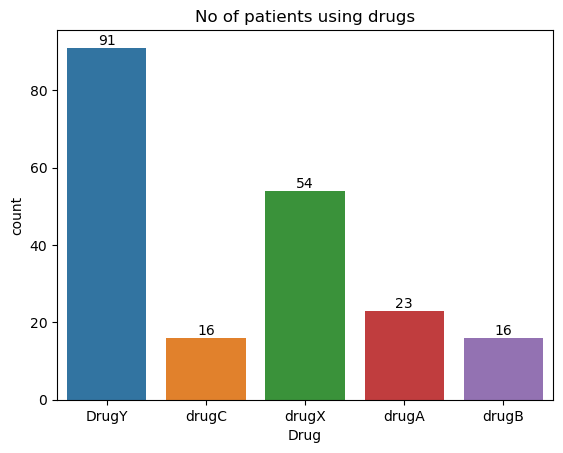

In [40]:
ab = sns.countplot(x=data["Drug"])
ab.bar_label(ab.containers[0], fontsize=10)
plt.title("No of patients using drugs")
plt.show()

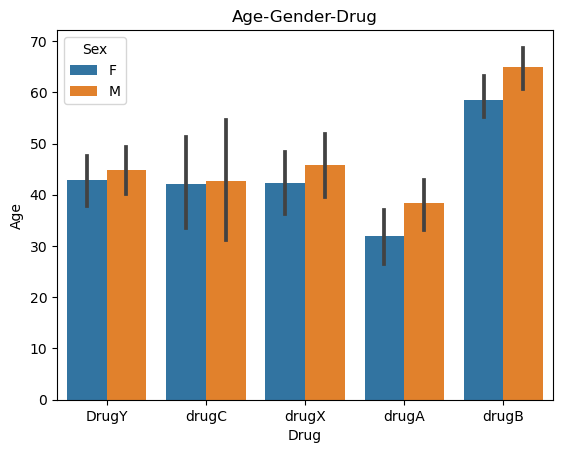

In [60]:
sns.barplot(x=data["Drug"], y=data["Age"], hue=data["Sex"])
plt.title("Age-Gender-Drug")
plt.show()

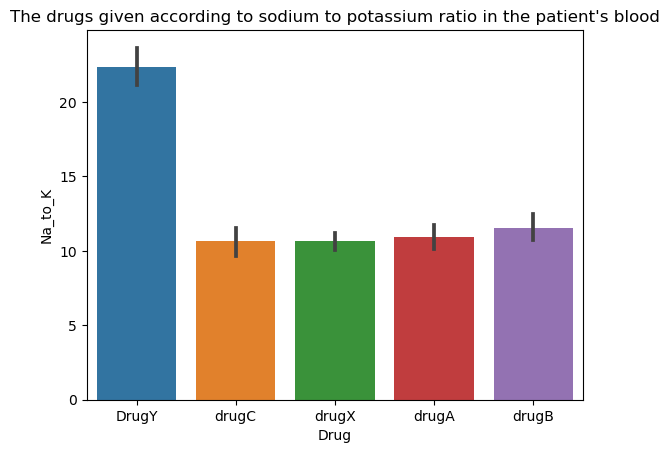

In [75]:
sns.barplot(x=data["Drug"], y=data["Na_to_K"])
plt.title("The drugs given according to sodium to potassium ratio in the patient's blood")
plt.show()

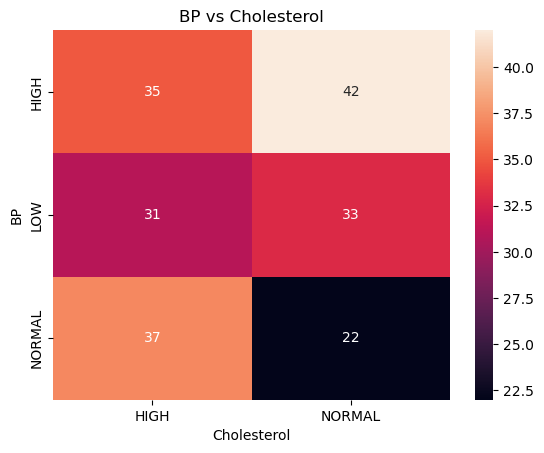

In [76]:
sns.heatmap(pd.crosstab(index=data["BP"], columns=data["Cholesterol"]),annot=True)
plt.title("BP vs Cholesterol")
plt.show()

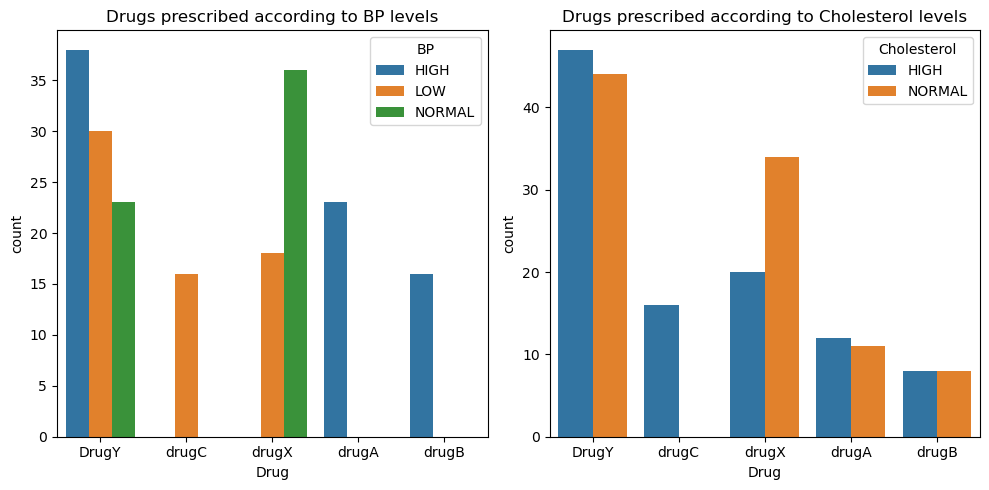

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=data["Drug"], hue=data["BP"])
plt.title("Drugs prescribed according to BP levels")

plt.subplot(1,2,2)
sns.countplot(x=data["Drug"],hue=data["Cholesterol"])
plt.title("Drugs prescribed according to Cholesterol levels")

plt.tight_layout()
plt.show()

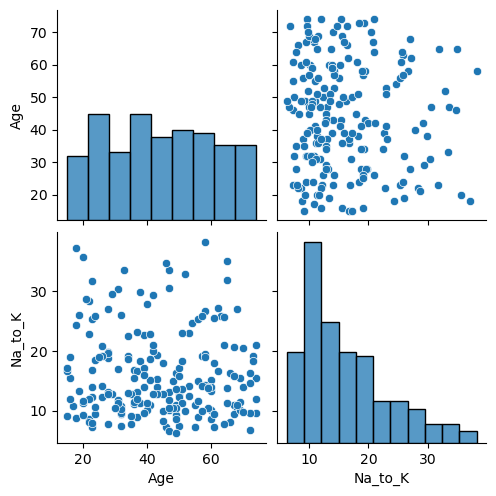

In [25]:
sns.pairplot(data)
plt.show()

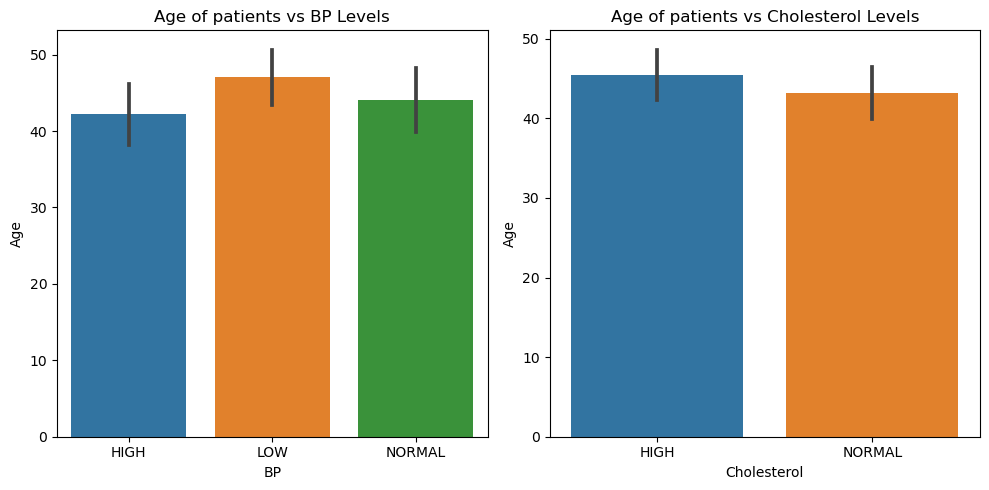

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=data["BP"], y=data["Age"])
plt.title("Age of patients vs BP Levels")

plt.subplot(1,2,2)
sns.barplot(x=data["Cholesterol"], y=data["Age"])
plt.title("Age of patients vs Cholesterol Levels")

plt.tight_layout()
plt.show()

### Split the dataset

In [7]:
feature_var = data.iloc[:, :-1]
feature_var

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [8]:
class_var = data.iloc[:,-1]
class_var

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [10]:
class_var = class_var.map({'DrugY':0, 'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4})

In [26]:
x_train,x_test,y_train,y_test=train_test_split(feature_var,class_var,test_size=0.2,random_state=5,stratify=class_var)

In [27]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,F,HIGH,HIGH,21.036
160,30,F,NORMAL,HIGH,10.443
179,67,F,NORMAL,HIGH,15.891
124,53,F,HIGH,NORMAL,12.495
141,64,F,LOW,NORMAL,25.741
...,...,...,...,...,...
136,55,F,HIGH,HIGH,10.977
70,70,M,HIGH,HIGH,13.967
37,39,M,LOW,NORMAL,13.938
2,47,M,LOW,HIGH,10.114


In [28]:
y_train

134    0
160    2
179    0
124    4
141    0
      ..
136    4
70     4
37     2
2      1
158    1
Name: Drug, Length: 160, dtype: int64

### Data Preprocessing

In [29]:
cat1_data=x_train[["Sex"]]
cat2_data=x_train[["BP","Cholesterol"]]
cat3_data=x_train[["Age", "Na_to_K"]]

In [38]:
cat1=Pipeline([("categories1",OneHotEncoder(drop="first"))])
cat2=Pipeline([("categories2",OrdinalEncoder())])
cat3=Pipeline([("scaling",MinMaxScaler())])

In [39]:
ctp=ColumnTransformer(transformers=[("encoding1",cat1,cat1_data.columns),("encoding2",cat2,cat2_data.columns),("encoding3",cat3,cat3_data.columns)],remainder="passthrough")

In [32]:
ctp

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoding1',
                                 Pipeline(steps=[('categories1',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['Sex'], dtype='object')),
                                ('encoding2',
                                 Pipeline(steps=[('categories2',
                                                  OrdinalEncoder())]),
                                 Index(['BP', 'Cholesterol'], dtype='object')),
                                ('encoding3',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'Na_to_K'], dtype='object'))])

In [40]:
pp_x_train=ctp.fit_transform(x_train)

### Building naive bayes model

In [45]:
mnb = MixedNB(categorical_features=[0,1,2])

In [46]:
model=mnb.fit(pp_x_train,y_train)

In [47]:
predicted_y=model.predict(ctp.fit_transform(x_test))

### Accuracy of the model

In [48]:
accuracy_score(y_test, predicted_y)

0.975

The model has 97% accuracy hence it is a good model

### Confusion Matrix

In [49]:
cm = confusion_matrix(y_test, predicted_y)
cm

array([[17,  0,  0,  0,  1],
       [ 0,  3,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

In [50]:
ConfusionMatrixDisplay(cm)

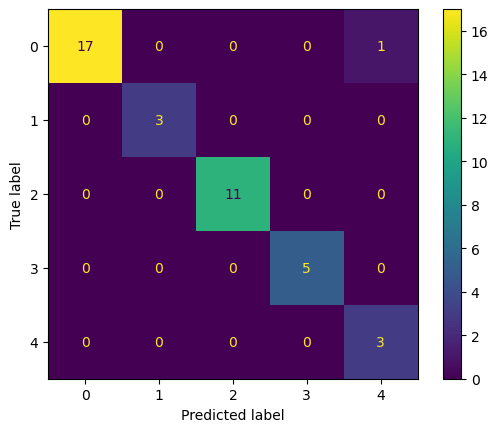

In [51]:
i=ConfusionMatrixDisplay(cm)
i.plot()
plt.show()

In [53]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         5
           4       0.75      1.00      0.86         3

    accuracy                           0.97        40
   macro avg       0.95      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



In [54]:
pickle.dump(ctp,open(r"C:\Users\Nithya\Videos\ctp.pkl","wb"))

In [55]:
pickle.dump(model,open(r"C:\Users\Nithya\Videos\drug-model.pkl","wb"))